<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/10%20Generative%20Adversarial%20Network/Boundary-Seeking%20GAN/boundary_seeking_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boundary-Seeking GAN

In [1]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Boundary-Seeking%20GAN/saved_model/bgan_discriminator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Boundary-Seeking%20GAN/saved_model/bgan_discriminator_weights.hdf5
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Boundary-Seeking%20GAN/saved_model/bgan_generator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Boundary-Seeking%20GAN/saved_model/bgan_generator_weights.hdf5

--2019-09-07 00:21:46--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Boundary-Seeking%20GAN/saved_model/bgan_discriminator.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2328 (2.3K) [text/plain]
Saving to: ‘bgan_discriminator.json’

bgan_discriminator. 100%[===================>]   2.27K  --.-KB/s    in 0s      

2019-09-07 00:21:46 (68.0 MB/s) - ‘bgan_discriminator.json’ saved [2328/2328]

--2019-09-07 00:21:47--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Boundary-Seeking%20GAN/saved_model/bgan_discriminator_weights.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.13

In [3]:
!ls

bgan_discriminator.json		 bgan_generator.json	      sample_data
bgan_discriminator_weights.hdf5  bgan_generator_weights.hdf5


In [4]:
def load_model(model_name):
    model_path = "%s.json" % model_name
    weights_path = "%s_weights.hdf5" % model_name
    
    
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_path)
    
    return loaded_model
  

generator = load_model("bgan_generator")
#discriminator = load_model("bgan_discriminator")

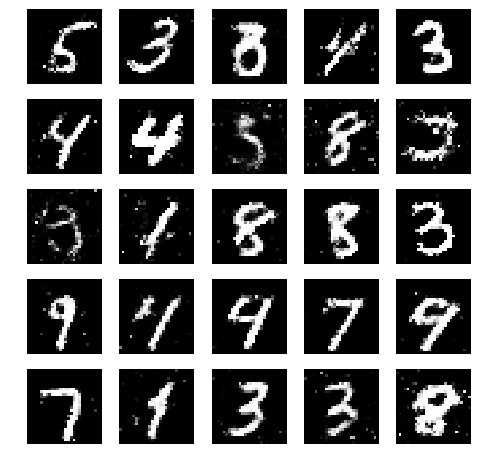

In [7]:
latent_dim = 100

def sample_images():
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c, figsize=(8,8))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    
    
sample_images()
